# 1. 라이브러리 및 데이터 세팅

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train.csv")
test  = pd.read_csv("data/test.csv")

In [3]:
len(train), len(test)

(891, 418)

In [4]:
all_df = pd.concat([train, test])
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 2. Cleansing
현재 단계에서 4가지의 cleansing을 합니다. <br> 
1) 이상한 값과 이상치 처리 <br>
2) 결측치 처리 <br>
3) 분석을 위한 새로운 feature 생성 <br>
4) 변수 타입 변경


In [6]:
print('Train columns with null values:\n', train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [7]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Laroche, Mr. Joseph Philippe Lemercier",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# age 열의 결측치를 median으로 채웁니다.
# embarked 열의 결측치를 최빈값으로 채웁니다.
# fare 열의 결측치를 median으로 채웁니다.
all_df["Age"]      = all_df['Age'].fillna(all_df['Age'].median())
all_df['Embarked'] = all_df['Embarked'].fillna(all_df['Embarked'].mode()[0])
all_df['Fare']     = all_df['Fare'].fillna(all_df['Fare'].median())

In [9]:
drop_column = ['PassengerId','Cabin', 'Ticket']
all_df = all_df.drop(drop_column, axis=1)

In [10]:
all_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [11]:
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch'] + 1

In [12]:
# IsAlone 열 생성(혼자 승선 여부)
all_df['IsAlone'] = 1 #initialize to yes/1 is alone
all_df['IsAlone'].loc[all_df['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

# Title(Mr, Ms, ...) 열 생성
all_df['Title'] = all_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# qcut: 빈도수로 자릅니다.
all_df['FareBin'] = pd.qcut(all_df['Fare'], 4)

# cut: 구간의 크기로 자릅니다.
all_df['AgeBin'] = pd.cut(all_df['Age'].astype(int), 5)

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = data


In [13]:
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in
title_names = (all_df['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
all_df['Title'] = all_df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(all_df['Title'].value_counts())
print("-"*10)

#preview data again
all_df.info()
all_df.info()
all_df.sample(10)

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    float64 
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Fare        1309 non-null   float64 
 8   Embarked    1309 non-null   object  
 9   FamilySize  1309 non-null   int64   
 10  IsAlone     1309 non-null   int64   
 11  Title       1309 non-null   object  
 12  FareBin     1309 non-null   category
 13  AgeBin      1309 non-null   category
dtypes: category(2), float64(3), int64(5), object(4)
memory usage: 125.9+ KB
<class 'pandas.core.frame.DataFrame'>

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
67,0.0,3,"Crease, Mr. Ernest James",male,19.0,0,0,8.1583,S,1,1,Mr,"(7.896, 14.454]","(16.0, 32.0]"
569,1.0,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,S,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
1018,NaN,3,"McCoy, Miss. Alicia",female,28.0,2,0,23.2500,Q,3,0,Miss,"(14.454, 31.275]","(16.0, 32.0]"
1118,NaN,3,"McNeill, Miss. Bridget",female,28.0,0,0,7.7500,Q,1,1,Miss,"(-0.001, 7.896]","(16.0, 32.0]"
917,NaN,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,61.9792,C,2,0,Miss,"(31.275, 512.329]","(16.0, 32.0]"
543,1.0,2,"Beane, Mr. Edward",male,32.0,1,0,26.0000,S,2,0,Mr,"(14.454, 31.275]","(16.0, 32.0]"
120,0.0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,73.5000,S,3,0,Mr,"(31.275, 512.329]","(16.0, 32.0]"
287,0.0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
1158,NaN,3,"Warren, Mr. Charles William",male,28.0,0,0,7.5500,S,1,1,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
1003,NaN,1,"Evans, Miss. Edith Corse",female,36.0,0,0,31.6792,C,1,1,Miss,"(31.275, 512.329]","(32.0, 48.0]"


In [14]:
# CONVERT: convert objects to category using Label Encoder for all_df
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# code categorical data
label, ohe = LabelEncoder(), OneHotEncoder()
obj_cols   = ["Sex", "Embarked", "Title"]

# label encoding
all_df['Sex_Code']      = label.fit_transform(all_df['Sex'])
all_df['Embarked_Code'] = label.fit_transform(all_df['Embarked'])
all_df['Title_Code']    = label.fit_transform(all_df['Title'])
all_df['AgeBin_Code']   = label.fit_transform(all_df['AgeBin'])
all_df['FareBin_Code']  = label.fit_transform(all_df['FareBin'])

# one hot encoding
ohe.fit(all_df[obj_cols])
ohe_cols = []
for cat_cols in ohe.categories_:
    for col in cat_cols:
        ohe_cols.append(col)

ohe_df = pd.DataFrame(ohe.transform(all_df[obj_cols]).toarray(), columns=ohe_cols)
all_df = pd.concat([all_df, ohe_df], axis=1)

In [15]:
print(all_df.isnull().sum())
print("-"*20)
print(all_df.info())
all_df.describe(include='all')

Survived         418
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
female             0
male               0
C                  0
Q                  0
S                  0
Master             0
Misc               0
Miss               0
Mr                 0
Mrs                0
dtype: int64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    float64 
 1   Pclass         1309 non-null   int64   
 2   Name           1309 non-null   object  
 3   Sex            1309 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,...,female,male,C,Q,S,Master,Misc,Miss,Mr,Mrs
count,891.000000,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309.000000,1309,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
unique,NaN,NaN,1307,2,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,NaN,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,843,NaN,NaN,NaN,NaN,916,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.294882,NaN,NaN,29.503186,0.498854,0.385027,33.281086,NaN,1.883881,...,0.355997,0.644003,0.206264,0.093965,0.699771,0.046600,0.025974,0.198625,0.578304,0.150497
std,0.486592,0.837836,NaN,NaN,12.905241,1.041658,0.865560,51.741500,NaN,1.583639,...,0.478997,0.478997,0.404777,0.291891,0.458533,0.210862,0.159119,0.399117,0.494019,0.357694
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.895800,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.275000,NaN,2.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [16]:
# ml을 진행할때 크게 3가지로 분류함
# 1. train - ml의 학습용 데이터
# 2. validation - 모델의 성능 및 평가용 데이터 
# 3. test - 최종적 모델의 점수 평가용 데이터
# train으로 학습을 시킨 뒤, validation으로 평가를 반복함
# 그 이유는 과적합(overfiting)
# overfiting - 학습용 데이터에 대해서만 학습을 하게될 경우, 새로운 데이터에 대하여 
# 유연하게 에측, 평가하지 못한다.

#define x variables for original features aka feature selection
all_df_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']

#coded for algorithm calculation
all_df_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']

#define x variables for original w/bin features to remove continuous variables
all_df_x_bin  = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']

In [17]:
target = "Survived"
for x in all_df_x:
    if all_df[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(all_df[[x, target]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
print(pd.crosstab(all_df['Title'],
                  all_df[target]),)

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
7      9       NaN
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0      

# 3. EDA(Visualization)

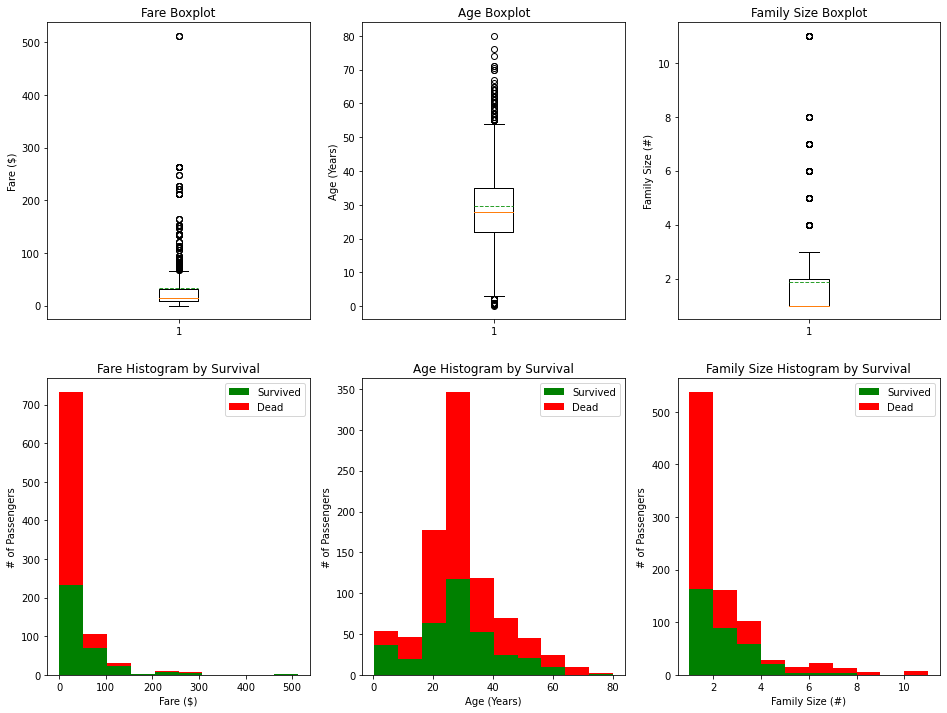

In [18]:
plt.figure(figsize=[16,12])

plt.subplot(2, 3, 1)
plt.boxplot(x=all_df['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(2, 3, 2)
plt.boxplot(all_df['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(2, 3, 3)
plt.boxplot(all_df['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(2, 3, 4)
plt.hist(x = [all_df[all_df['Survived']==1]['Fare'], all_df[all_df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
# stacked = 그래프 위에 그래프를 얹는다. 먼저 들어가는것을 survived = 1 이후 = 0 인 사람들
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(x = [all_df[all_df['Survived']==1]['Age'], all_df[all_df['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(x = [all_df[all_df['Survived']==1]['FamilySize'], all_df[all_df['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

In [19]:
# # showmeans = True, meanline = True
# plt.subplot(131)
# plt.boxplot(all_df["Age"])

# plt.subplot(132)
# plt.boxplot(all_df['Age'], showmeans=True)

# plt.subplot(133)
# plt.boxplot(all_df['Age'], showmeans=True, meanline=True)

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

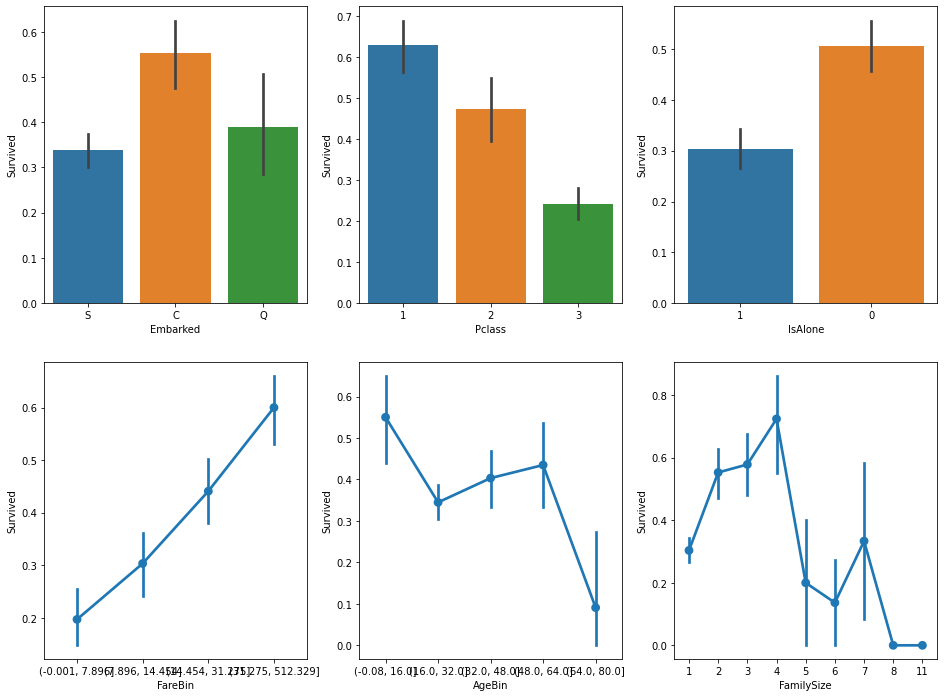

In [20]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=all_df, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=all_df, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=all_df, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=all_df, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=all_df, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=all_df, ax = saxis[1,2])


In [21]:
# 2중 for문을 활용하여 그래프 나타내기
# fig, saxis = plt.subplots(2, 3,figsize=(16,12))


# check_col = ["Embarked", "Pclass", "IsAlone", 
#              "FareBin", "AgeBin", "FamilySize"]

# i = 0
# for axes in saxis:
#     for ax in axes:
#         col = check_col[i]
#         if i < 3:            
#             sns.barplot(x=col, y='Survived', data=all_df, ax=ax)
#         else:
#             sns.pointplot(x=col, y='Survived', data=all_df, ax=ax)
#         i += 1

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

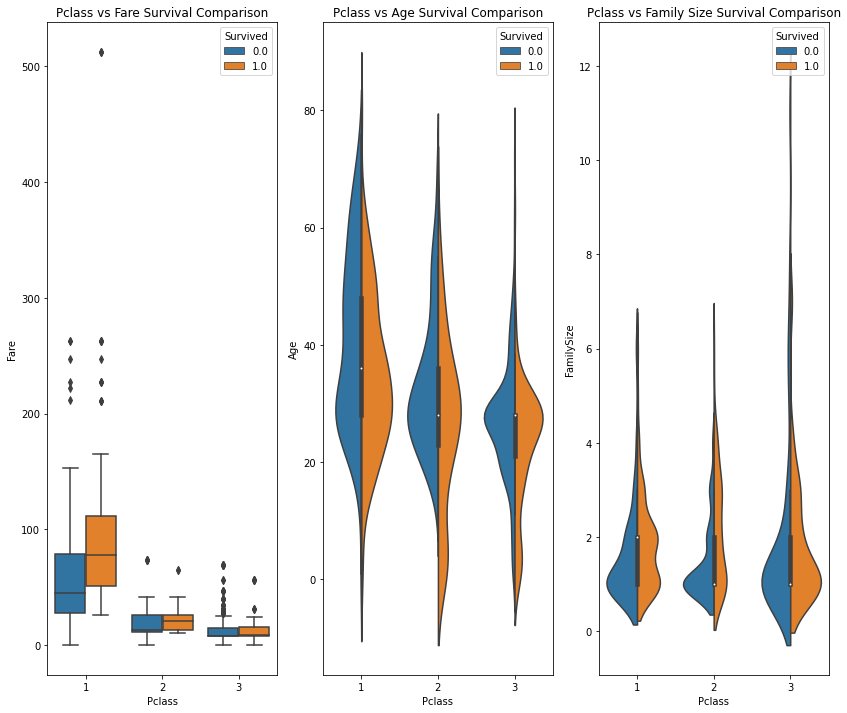

In [22]:
# 양적 데이터의 분포그래프: Pclass
# Pclass 변수가 생사여부에 영향을 미친다는 것을 알고 있습니다.
# 따라서, Pclass와 두 번째 feature를 비교해보겠습니다.
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=all_df, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=all_df, split=True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.violinplot(x='Pclass', y='FamilySize', hue='Survived', data=all_df, split=True, ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

In [23]:
all_df.groupby('Pclass')['FamilySize'].mean()

Pclass
1    1.801858
2    1.761733
3    1.968970
Name: FamilySize, dtype: float64

In [24]:
all_df[all_df["FamilySize"] >= 4].groupby("Pclass")["Name"].count()

Pclass
1    20
2    22
3    83
Name: Name, dtype: int64

In [25]:
for i in sorted(all_df['FamilySize'].unique()):
    print('FamilySize:', i)
    print(all_df[all_df["FamilySize"] == i].groupby("Pclass")["Name"].count())
    print('-'*10,'\n')

FamilySize: 1
Pclass
1    160
2    158
3    472
Name: Name, dtype: int64
---------- 

FamilySize: 2
Pclass
1    104
2     52
3     79
Name: Name, dtype: int64
---------- 

FamilySize: 3
Pclass
1    39
2    45
3    75
Name: Name, dtype: int64
---------- 

FamilySize: 4
Pclass
1     9
2    20
3    14
Name: Name, dtype: int64
---------- 

FamilySize: 5
Pclass
1     5
2     1
3    16
Name: Name, dtype: int64
---------- 

FamilySize: 6
Pclass
1     6
2     1
3    18
Name: Name, dtype: int64
---------- 

FamilySize: 7
Pclass
3    16
Name: Name, dtype: int64
---------- 

FamilySize: 8
Pclass
3    8
Name: Name, dtype: int64
---------- 

FamilySize: 11
Pclass
3    11
Name: Name, dtype: int64
---------- 



In [26]:
all_df['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

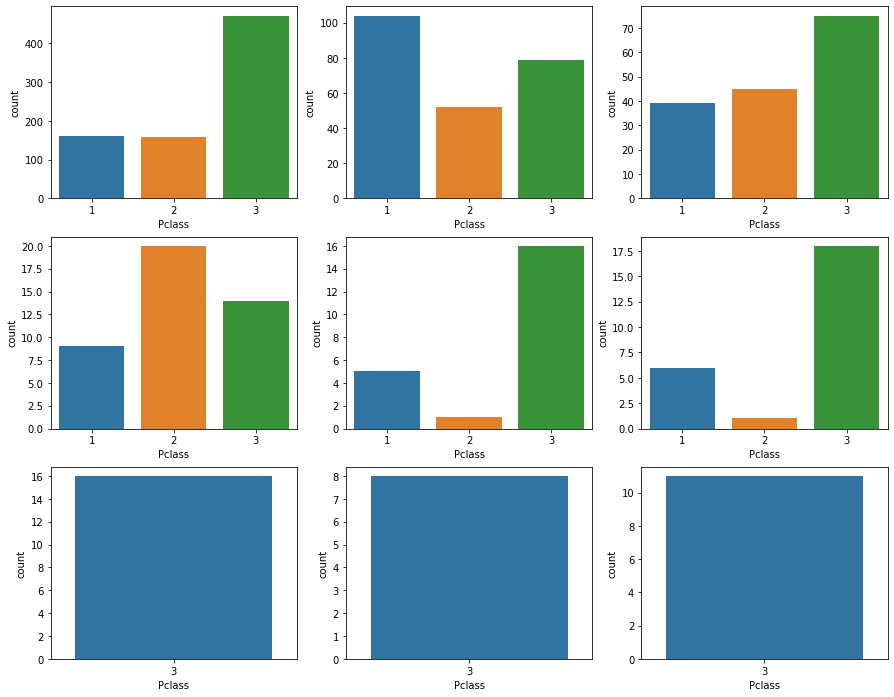

In [27]:
fig, saxis = plt.subplots(3, 3,figsize=(15,12))

sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 1], ax=saxis[0,0])
sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 2], ax=saxis[0,1])
sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 3], ax=saxis[0,2])
sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 4], ax=saxis[1,0])
sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 5], ax=saxis[1,1])
sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 6], ax=saxis[1,2])
sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 7], ax=saxis[2,0])
sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 8], ax=saxis[2,1])
sns.countplot(x='Pclass', data=all_df[all_df["FamilySize"] == 11], ax=saxis[2,2])

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

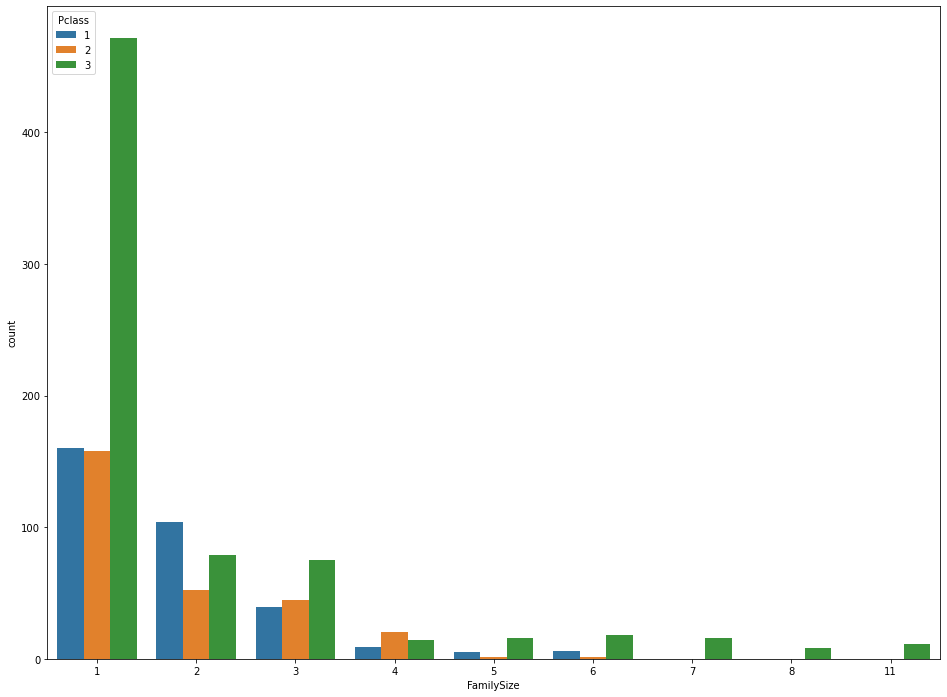

In [28]:
plt.figure(figsize=(16, 12))
sns.countplot(data=all_df, x="FamilySize", hue="Pclass")

In [29]:
# pyplot seaborn 공부하기 
# https://www.geeksforgeeks.org/difference-between-matplotlib-vs-seaborn/ 공부하려면 참고하기

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

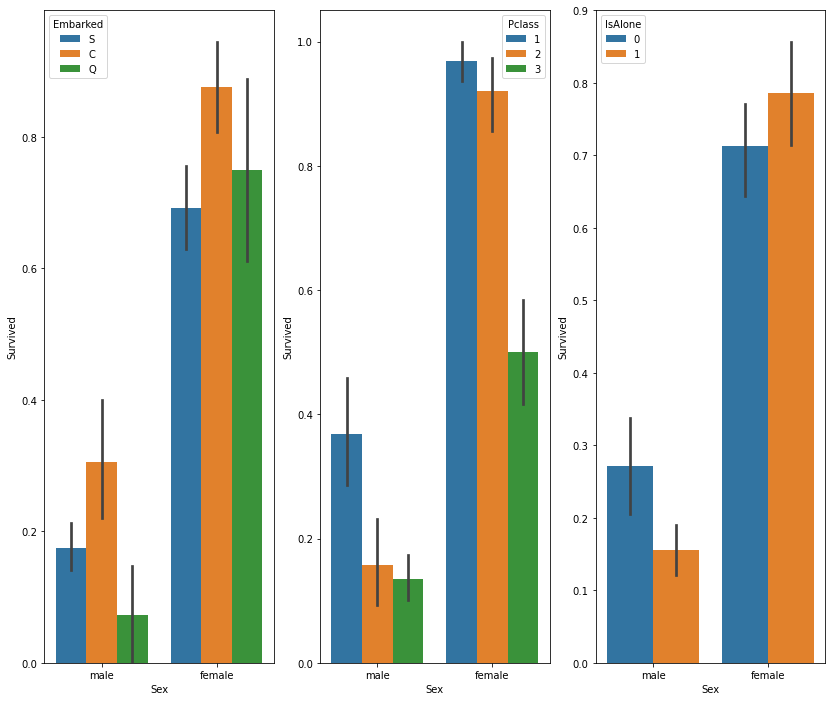

In [30]:
#양적 데이터의 분포그래프: Sex
# Pclass 변수가 생사여부에 영향을 미친다는 것을 알고 있습니다.
# 따라서, Sex와 두 번째 feature를 비교해보겠습니다.
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=all_df, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=all_df, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=all_df, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

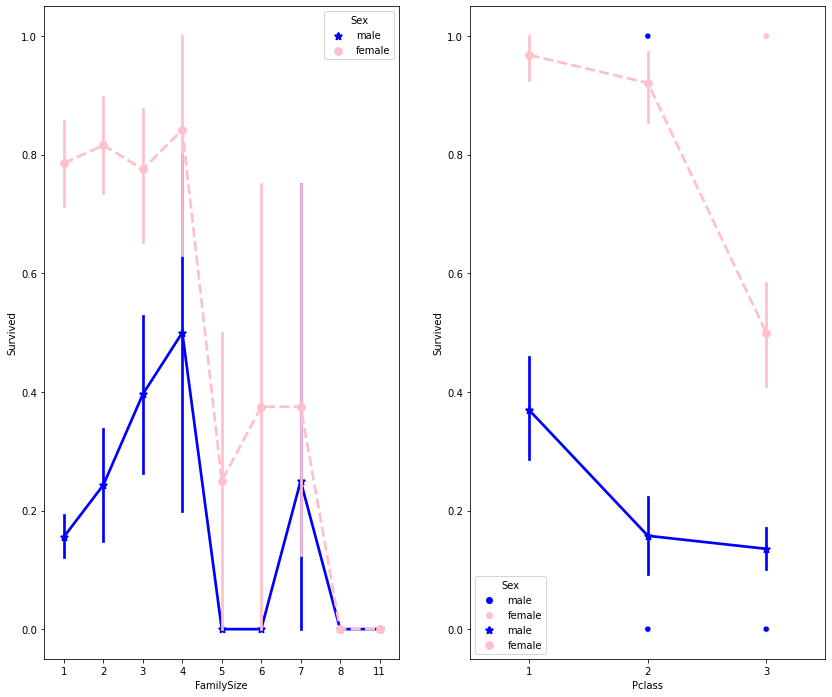

In [38]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=all_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=all_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

In [39]:
# pointplat - scatterplot의 중심경향성을 띄는 점을 찍은 뒤, 유의수준을 나타낸다.
# scatterplot - 
# 함수에 커서를 올리고 shift + tab = 작성한 함수의 간략한 설명을 볼 수 있음.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


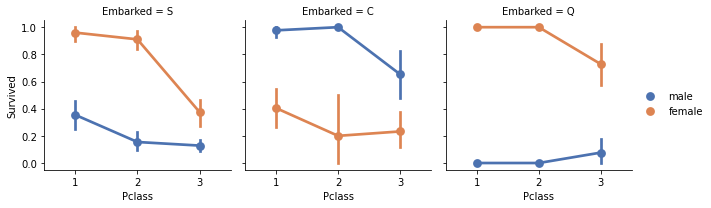

In [43]:
#how does embark port factor with class, sex, and survival compare
e = sns.FacetGrid(all_df, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# 위 사이트는 FacetGrid 듀토리얼 
# FacetGrid - 다중 그래프를 한번에 만들어준다.

In [50]:
all_df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [55]:
all_df.groupby('Embarked')['Sex'].count()

Embarked
C    270
Q    123
S    916
Name: Sex, dtype: int64

In [56]:
all_df.groupby(["Embarked", "Sex"])["Name"].count()

Embarked  Sex   
C         female    113
          male      157
Q         female     60
          male       63
S         female    293
          male      623
Name: Name, dtype: int64

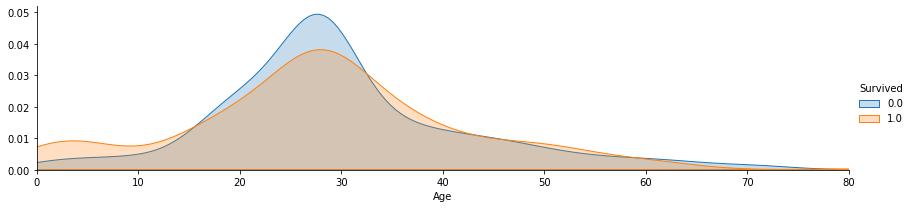

In [58]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid(all_df, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , all_df['Age'].max()))
a.add_legend()

# kdeplot - 히스토그램보다 직관적으로 부드럽게 만들어주는 그래프.

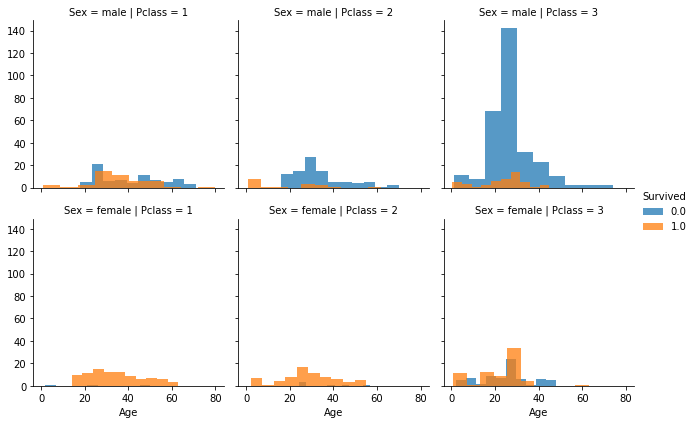

In [61]:
# histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(all_df, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

# Sex = ['male','female'] - row = 2
# Pclass = [1,2,3] - col = 3

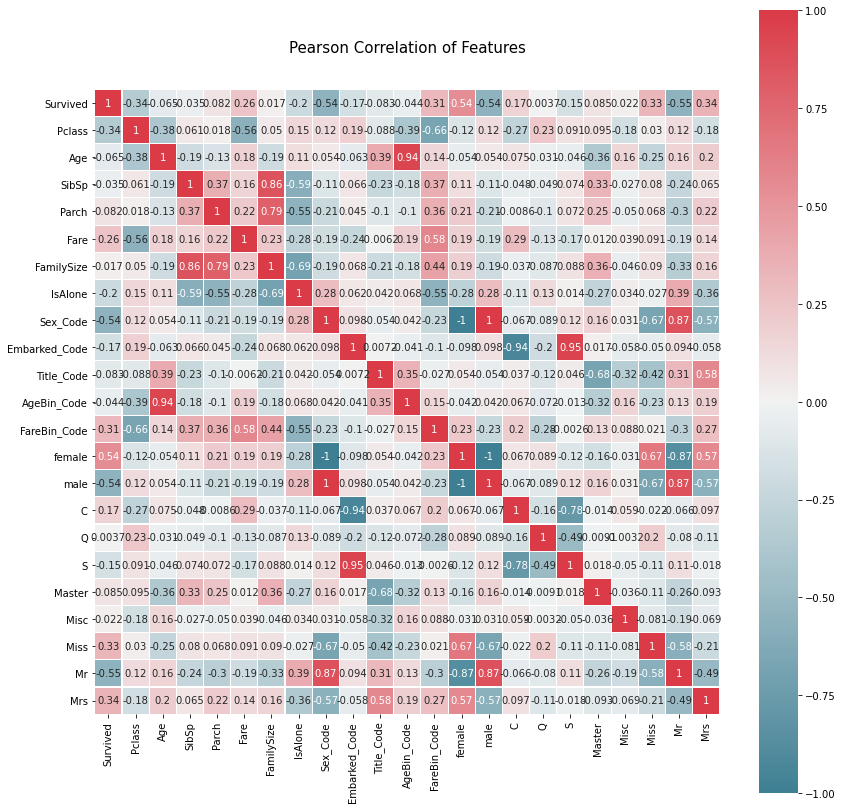

In [64]:
#pair plots of entire dataset
# pp = sns.pairplot(all_df, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
# pp.set(xticklabels=[])

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 16))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(all_df)

# 4. 모델링(Modeling)

In [65]:
# 임시 저장
temp_df = all_df[::]

# 복구
# all_df = temp_df[::]

In [66]:
all_df = all_df.drop(obj_cols + ["Name", "FareBin", "AgeBin"], axis=1)
train = all_df.loc[:890, :]
test  = all_df.loc[891:, :].reset_index(drop=True)
len(train), len(test)

(891, 418)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
rfc = RandomForestClassifier(n_jobs=-1)

# 학습
logr.fit(train.drop([target], axis=1),train[target])
rfc.fit(train.drop([target], axis=1),train[target])


# 예측
logr_pred = logr.predict(test.drop([target], axis=1))
rfc_pred = rfc.predict(test.drop([target], axis=1))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
sub = pd.read_csv("data/gender_submission.csv")
sub.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [69]:
sub["Survived"] = logr_pred[:]
sub["Survived"] = sub["Survived"].astype(int)

sub.to_csv("sub/logr1.csv", index=0)

sub["Survived"] = rfc_pred[:]
sub["Survived"] = sub["Survived"].astype(int)

sub.to_csv("sub/rfc1.csv", index=0)